# 1.Imputacion y Encoding del Dataset de Calificaciones

Este notebook describe el proceso de imputacion y transformación del dataset de calificaciones.


In [1]:
import sys
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()

current_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.abspath(os.path.join(current_dir, '..', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo BlueLight personalizado
def configurar_estilo_bluelight():
    sns.set_theme(style="whitegrid")
    plt.rcParams.update({
        "axes.facecolor": "#F5F9FF",
        "figure.facecolor": "#F5F9FF",
        "axes.edgecolor": "#CCCCCC",
        "axes.labelcolor": "#333333",
        "xtick.color": "#333333",
        "ytick.color": "#333333",
        "text.color": "#003366",
        "axes.titleweight": "bold",
        "axes.titlesize": 14,
        "axes.titlecolor": "#003366"
    })


## 1.1. Estado inicial de dataset de notas  
 - Lectura de dataset previamente limpio
 - Revision preeliminar de datos faltantes 

In [5]:
#df_limpio = pd.read_csv("../../data/processed/data_clean_notes_2021_2025.csv")
df_limpio = pd.read_csv("../../data/processed/data_clean_notes_2023_2025.csv")

In [6]:
df_limpio['Grado'] = df_limpio['Grado'].astype(int)

df_limpio.info()
# Conteo de valores nulos
df_limpio.isnull().sum()
#cambiar grado a int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32676 entries, 0 to 32675
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sede                32676 non-null  object 
 1   Estudiante          32676 non-null  object 
 2   Grado               32676 non-null  int32  
 3   Grupo               32676 non-null  object 
 4   Periodo             32676 non-null  int64  
 5   Año                 32676 non-null  int64  
 6   Intensidad_Horaria  32676 non-null  int64  
 7   Asignatura          32676 non-null  object 
 8   Cog                 32571 non-null  float64
 9   Proc                32571 non-null  float64
 10  Act                 32676 non-null  int64  
 11  Axi                 32676 non-null  int64  
 12  Docente             32676 non-null  object 
 13  Resultado           32676 non-null  int64  
 14  Nivel               32676 non-null  object 
 15  Identificación      32676 non-null  object 
dtypes: f

Sede                    0
Estudiante              0
Grado                   0
Grupo                   0
Periodo                 0
Año                     0
Intensidad_Horaria      0
Asignatura              0
Cog                   105
Proc                  105
Act                     0
Axi                     0
Docente                 0
Resultado               0
Nivel                   0
Identificación          0
dtype: int64

## 1.2. Imputar cantidad de Asignaturas por Estudiante  
- Crear diccionario de Asignaturas como punto de comparacion

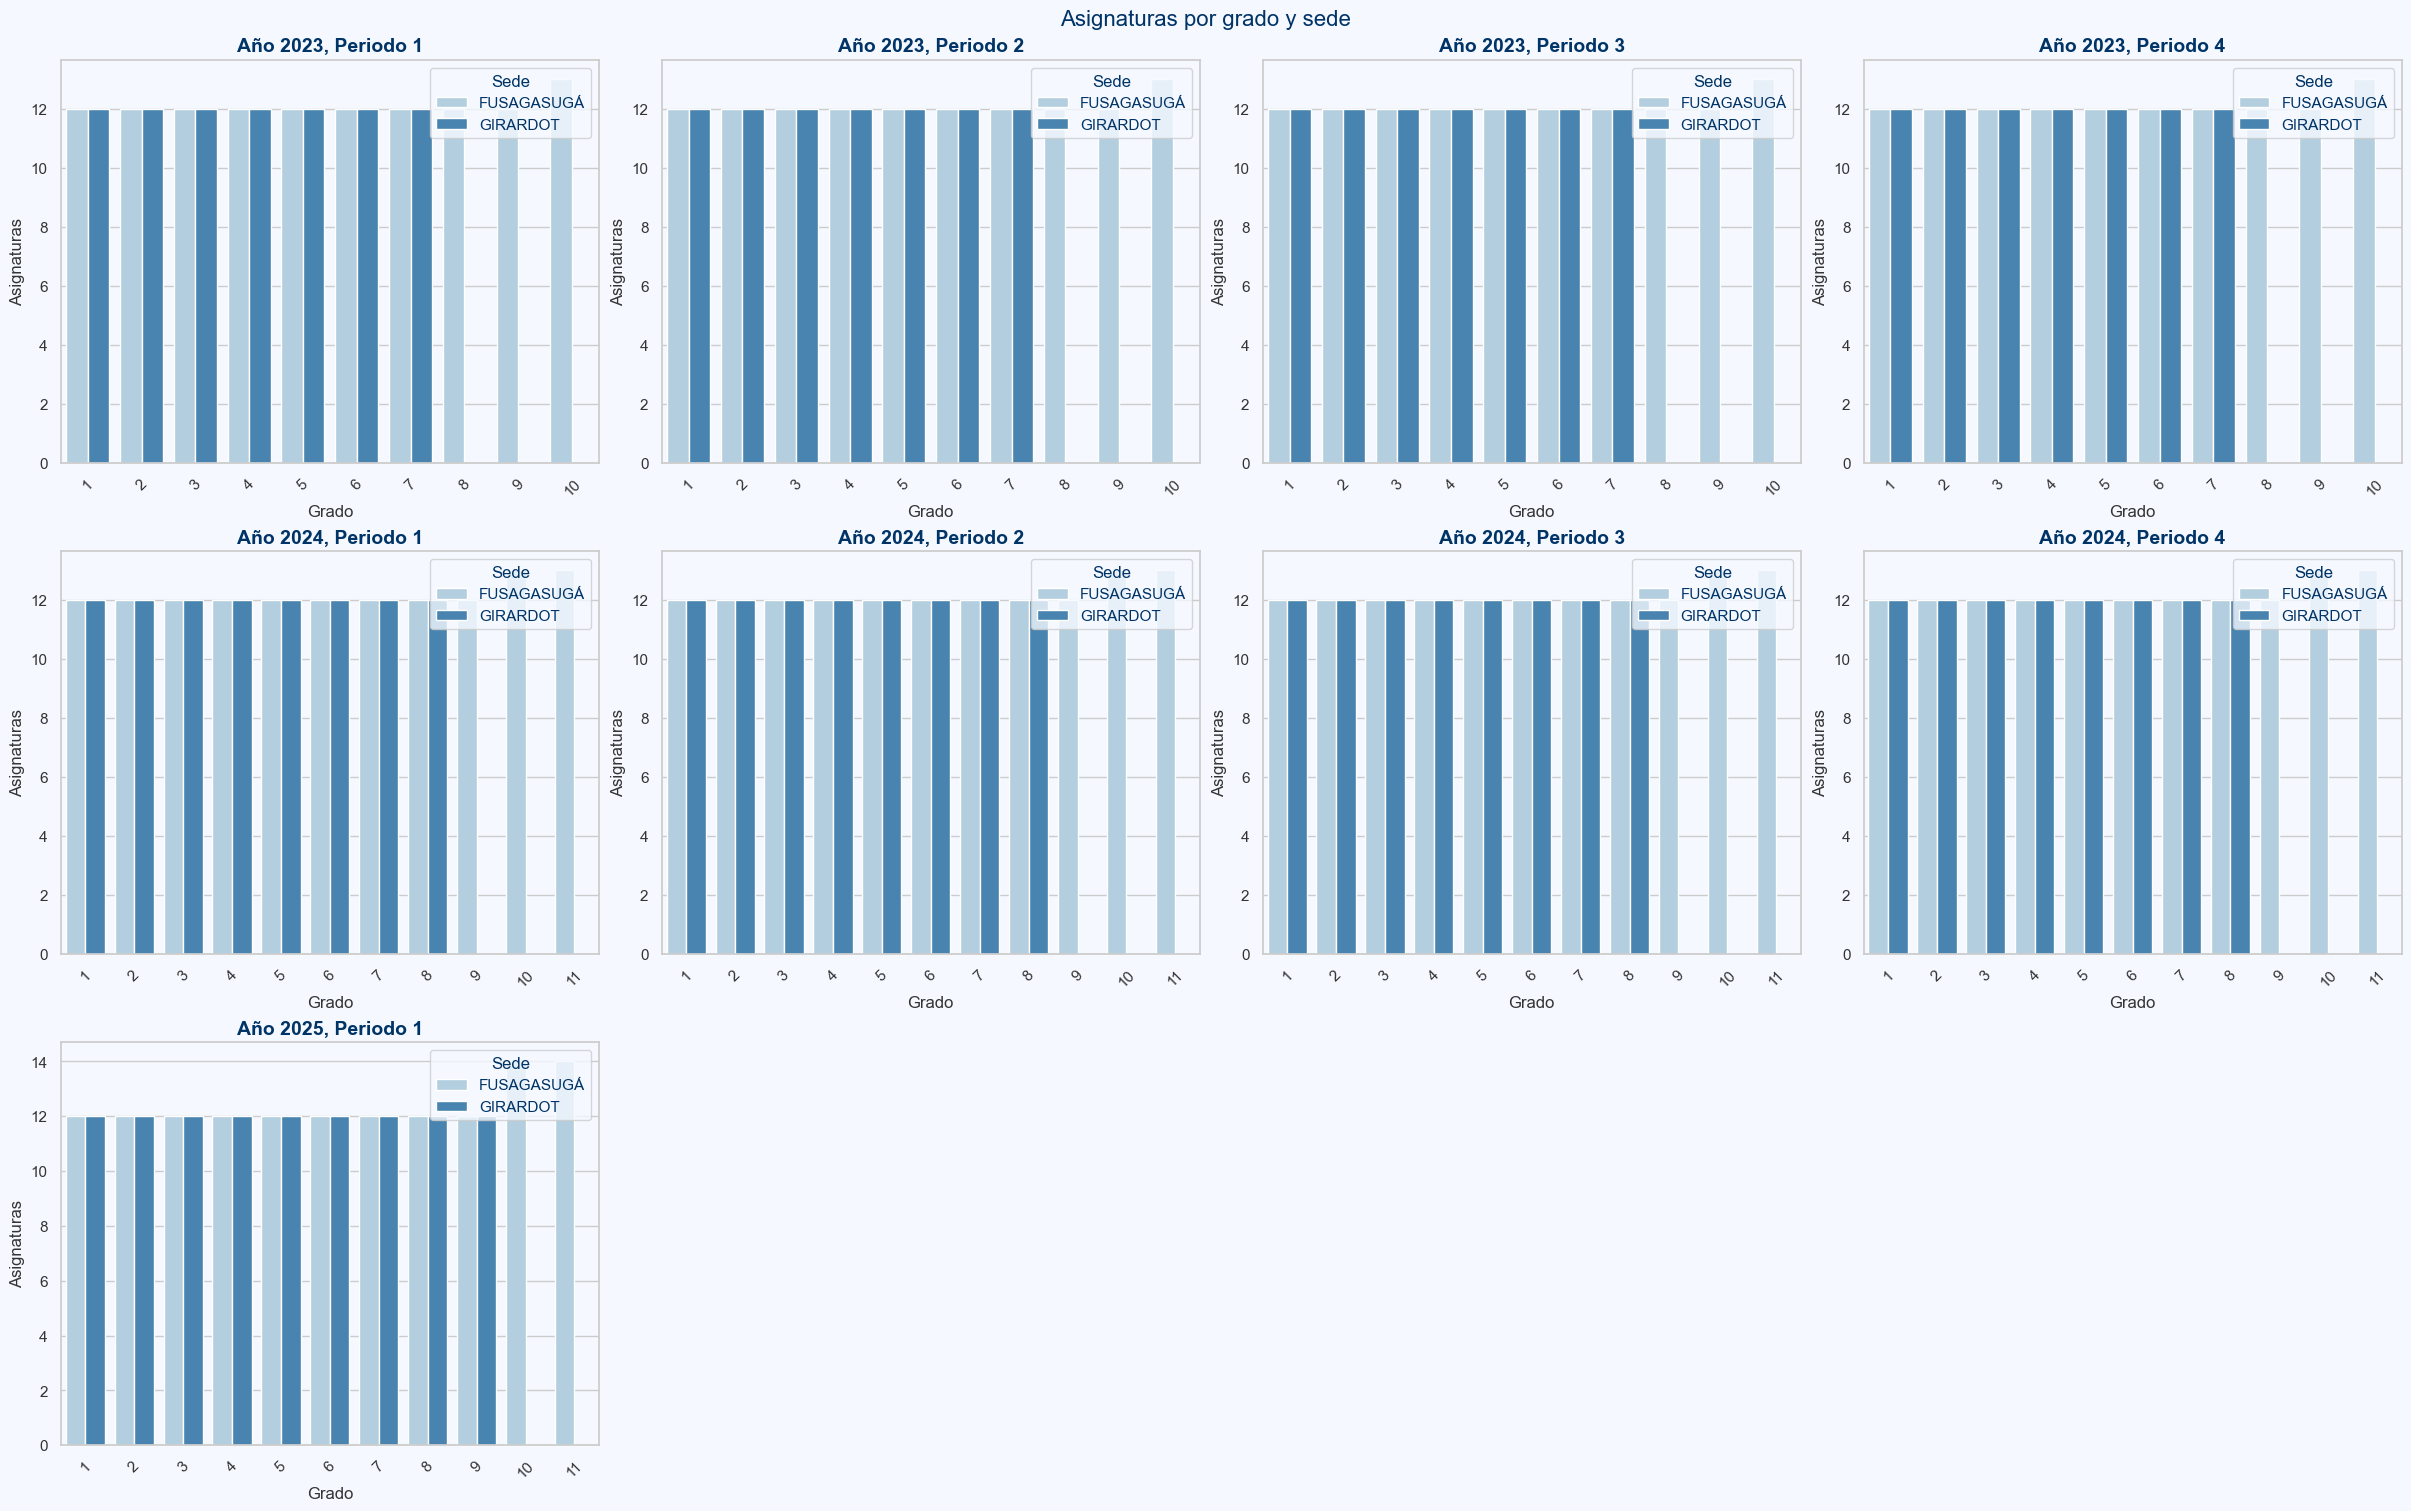

In [7]:
import math

def graficar_asignaturas_grid(df: pd.DataFrame):
    configurar_estilo_bluelight()
    años_periodos = df[['Año', 'Periodo']].drop_duplicates().sort_values(['Año', 'Periodo'])
    total = len(años_periodos)
    cols = 4
    rows = math.ceil(total / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5), constrained_layout=True)
    axes = axes.flatten()

    for i, (_, row) in enumerate(años_periodos.iterrows()):
        año, periodo = row['Año'], row['Periodo']
        subset = df[(df['Año'] == año) & (df['Periodo'] == periodo)]
        conteo = (
            subset.drop_duplicates(["Grado", "Sede", "Asignatura"])
                  .groupby(["Grado", "Sede"])
                  .size()
                  .reset_index(name="Cantidad de asignaturas")
        )

        sns.barplot(data=conteo, x="Grado", y="Cantidad de asignaturas", hue="Sede", palette="Blues", ax=axes[i])
        axes[i].set_title(f"Año {año}, Periodo {periodo}")
        axes[i].set_xlabel("Grado")
        axes[i].set_ylabel("Asignaturas")
        axes[i].tick_params(axis='x', rotation=45)
    
    # Quitar ejes vacíos si hay menos de 3*N combinaciones
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle("Asignaturas por grado y sede", fontsize=16)
    plt.show()
graficar_asignaturas_grid(df_limpio)

In [8]:
asignaturas_por_grado_sede = (
    df_limpio.groupby([ "Año","Sede","Grado","Periodo"])["Asignatura"]
    .unique()
    .apply(lambda x: sorted(set(x)))
    .unstack()
    .to_dict(orient="index")
)


In [9]:
asignaturas_por_grado_sede

{(2023,
  'FUSAGASUGÁ',
  1): {1: ['APRENDIZAJE BASADO EN PROYECTOS',
   'ARTES',
   'CIENCIAS NATURALES',
   'CIENCIAS SOCIALES',
   'CREATIVIDAD E INNOVACIÓN',
   'EDUCACIÓN FÍSICA',
   'INGLÉS',
   'INTELIGENCIA EMOCIONAL E INTEGRALIDAD',
   'LECTURA CRÍTICA',
   'LENGUA CASTELLANA',
   'MATEMÁTICAS',
   'ROBÓTICA Y TICS'], 2: ['APRENDIZAJE BASADO EN PROYECTOS',
   'ARTES',
   'CIENCIAS NATURALES',
   'CIENCIAS SOCIALES',
   'CREATIVIDAD E INNOVACIÓN',
   'EDUCACIÓN FÍSICA',
   'INGLÉS',
   'INTELIGENCIA EMOCIONAL E INTEGRALIDAD',
   'LECTURA CRÍTICA',
   'LENGUA CASTELLANA',
   'MATEMÁTICAS',
   'ROBÓTICA Y TICS'], 3: ['APRENDIZAJE BASADO EN PROYECTOS',
   'ARTES',
   'CIENCIAS NATURALES',
   'CIENCIAS SOCIALES',
   'CREATIVIDAD E INNOVACIÓN',
   'EDUCACIÓN FÍSICA',
   'INGLÉS',
   'INTELIGENCIA EMOCIONAL E INTEGRALIDAD',
   'LECTURA CRÍTICA',
   'LENGUA CASTELLANA',
   'MATEMÁTICAS',
   'ROBÓTICA Y TICS'], 4: ['APRENDIZAJE BASADO EN PROYECTOS',
   'ARTES',
   'CIENCIAS NATURALES',

 - Graficar tendencia de Asignaturas por sede y año

In [10]:
print(df_limpio.dtypes)

Sede                   object
Estudiante             object
Grado                   int32
Grupo                  object
Periodo                 int64
Año                     int64
Intensidad_Horaria      int64
Asignatura             object
Cog                   float64
Proc                  float64
Act                     int64
Axi                     int64
Docente                object
Resultado               int64
Nivel                  object
Identificación         object
dtype: object


In [11]:
def imputar_asignaturas_faltantes(df, asignaturas_por_grado_sede):
    """
    Imputa asignaturas faltantes por estudiante según Año, Periodo, Sede y Grado.
    Las nuevas filas contienen NaN en las columnas no clave.
    """
    columnas_clave = ["Año", "Periodo", "Sede", "Grado", "Identificación"]
    columnas_base = columnas_clave + ["Asignatura"]

    # Forzar tipo string en claves para evitar errores
    for col in columnas_base:
        df[col] = df[col].astype(str)

    # Columnas adicionales a imputar con NaN
    columnas_adicionales = [col for col in df.columns if col not in columnas_base]
    print(f"Columnas adicionales: {columnas_adicionales}")
    nuevas_filas = []
    claves_existentes = set(
        df[columnas_base].drop_duplicates().apply(tuple, axis=1)
    )

    for _, row in df[columnas_clave].drop_duplicates().iterrows():
        clave = tuple(row[col] for col in columnas_clave)
        año, periodo, sede, grado, doc_id = clave

        asignaturas_esperadas = asignaturas_por_grado_sede.get((año, sede, grado), [])

        for asignatura in asignaturas_esperadas:
            fila_clave = clave + (asignatura,)
            if fila_clave not in claves_existentes:
                nueva_fila = {
                    "Año": año,
                    "Periodo": periodo,
                    "Sede": sede,
                    "Grado": grado,
                    "Identificación": doc_id,
                    "Asignatura": asignatura
                }
                for col in columnas_adicionales:
                    nueva_fila[col] = np.nan
                nuevas_filas.append(nueva_fila)

    df_nuevas = pd.DataFrame(nuevas_filas)
    df_final = pd.concat([df, df_nuevas], ignore_index=True)

    print(f"Filas imputadas: {len(df_nuevas)}")
    return df_final


In [12]:
df_imputado = imputar_asignaturas_faltantes(df_limpio, asignaturas_por_grado_sede)
df_imputado.info()
# Conteo de valores nulos
df_imputado.isnull().sum()

Columnas adicionales: ['Estudiante', 'Grupo', 'Intensidad_Horaria', 'Cog', 'Proc', 'Act', 'Axi', 'Docente', 'Resultado', 'Nivel']
Filas imputadas: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32676 entries, 0 to 32675
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sede                32676 non-null  object 
 1   Estudiante          32676 non-null  object 
 2   Grado               32676 non-null  object 
 3   Grupo               32676 non-null  object 
 4   Periodo             32676 non-null  object 
 5   Año                 32676 non-null  object 
 6   Intensidad_Horaria  32676 non-null  int64  
 7   Asignatura          32676 non-null  object 
 8   Cog                 32571 non-null  float64
 9   Proc                32571 non-null  float64
 10  Act                 32676 non-null  int64  
 11  Axi                 32676 non-null  int64  
 12  Docente             32676 non-null  object 
 13  Re

Sede                    0
Estudiante              0
Grado                   0
Grupo                   0
Periodo                 0
Año                     0
Intensidad_Horaria      0
Asignatura              0
Cog                   105
Proc                  105
Act                     0
Axi                     0
Docente                 0
Resultado               0
Nivel                   0
Identificación          0
dtype: int64

## 1.4. Imputacion Grupo y Nivel

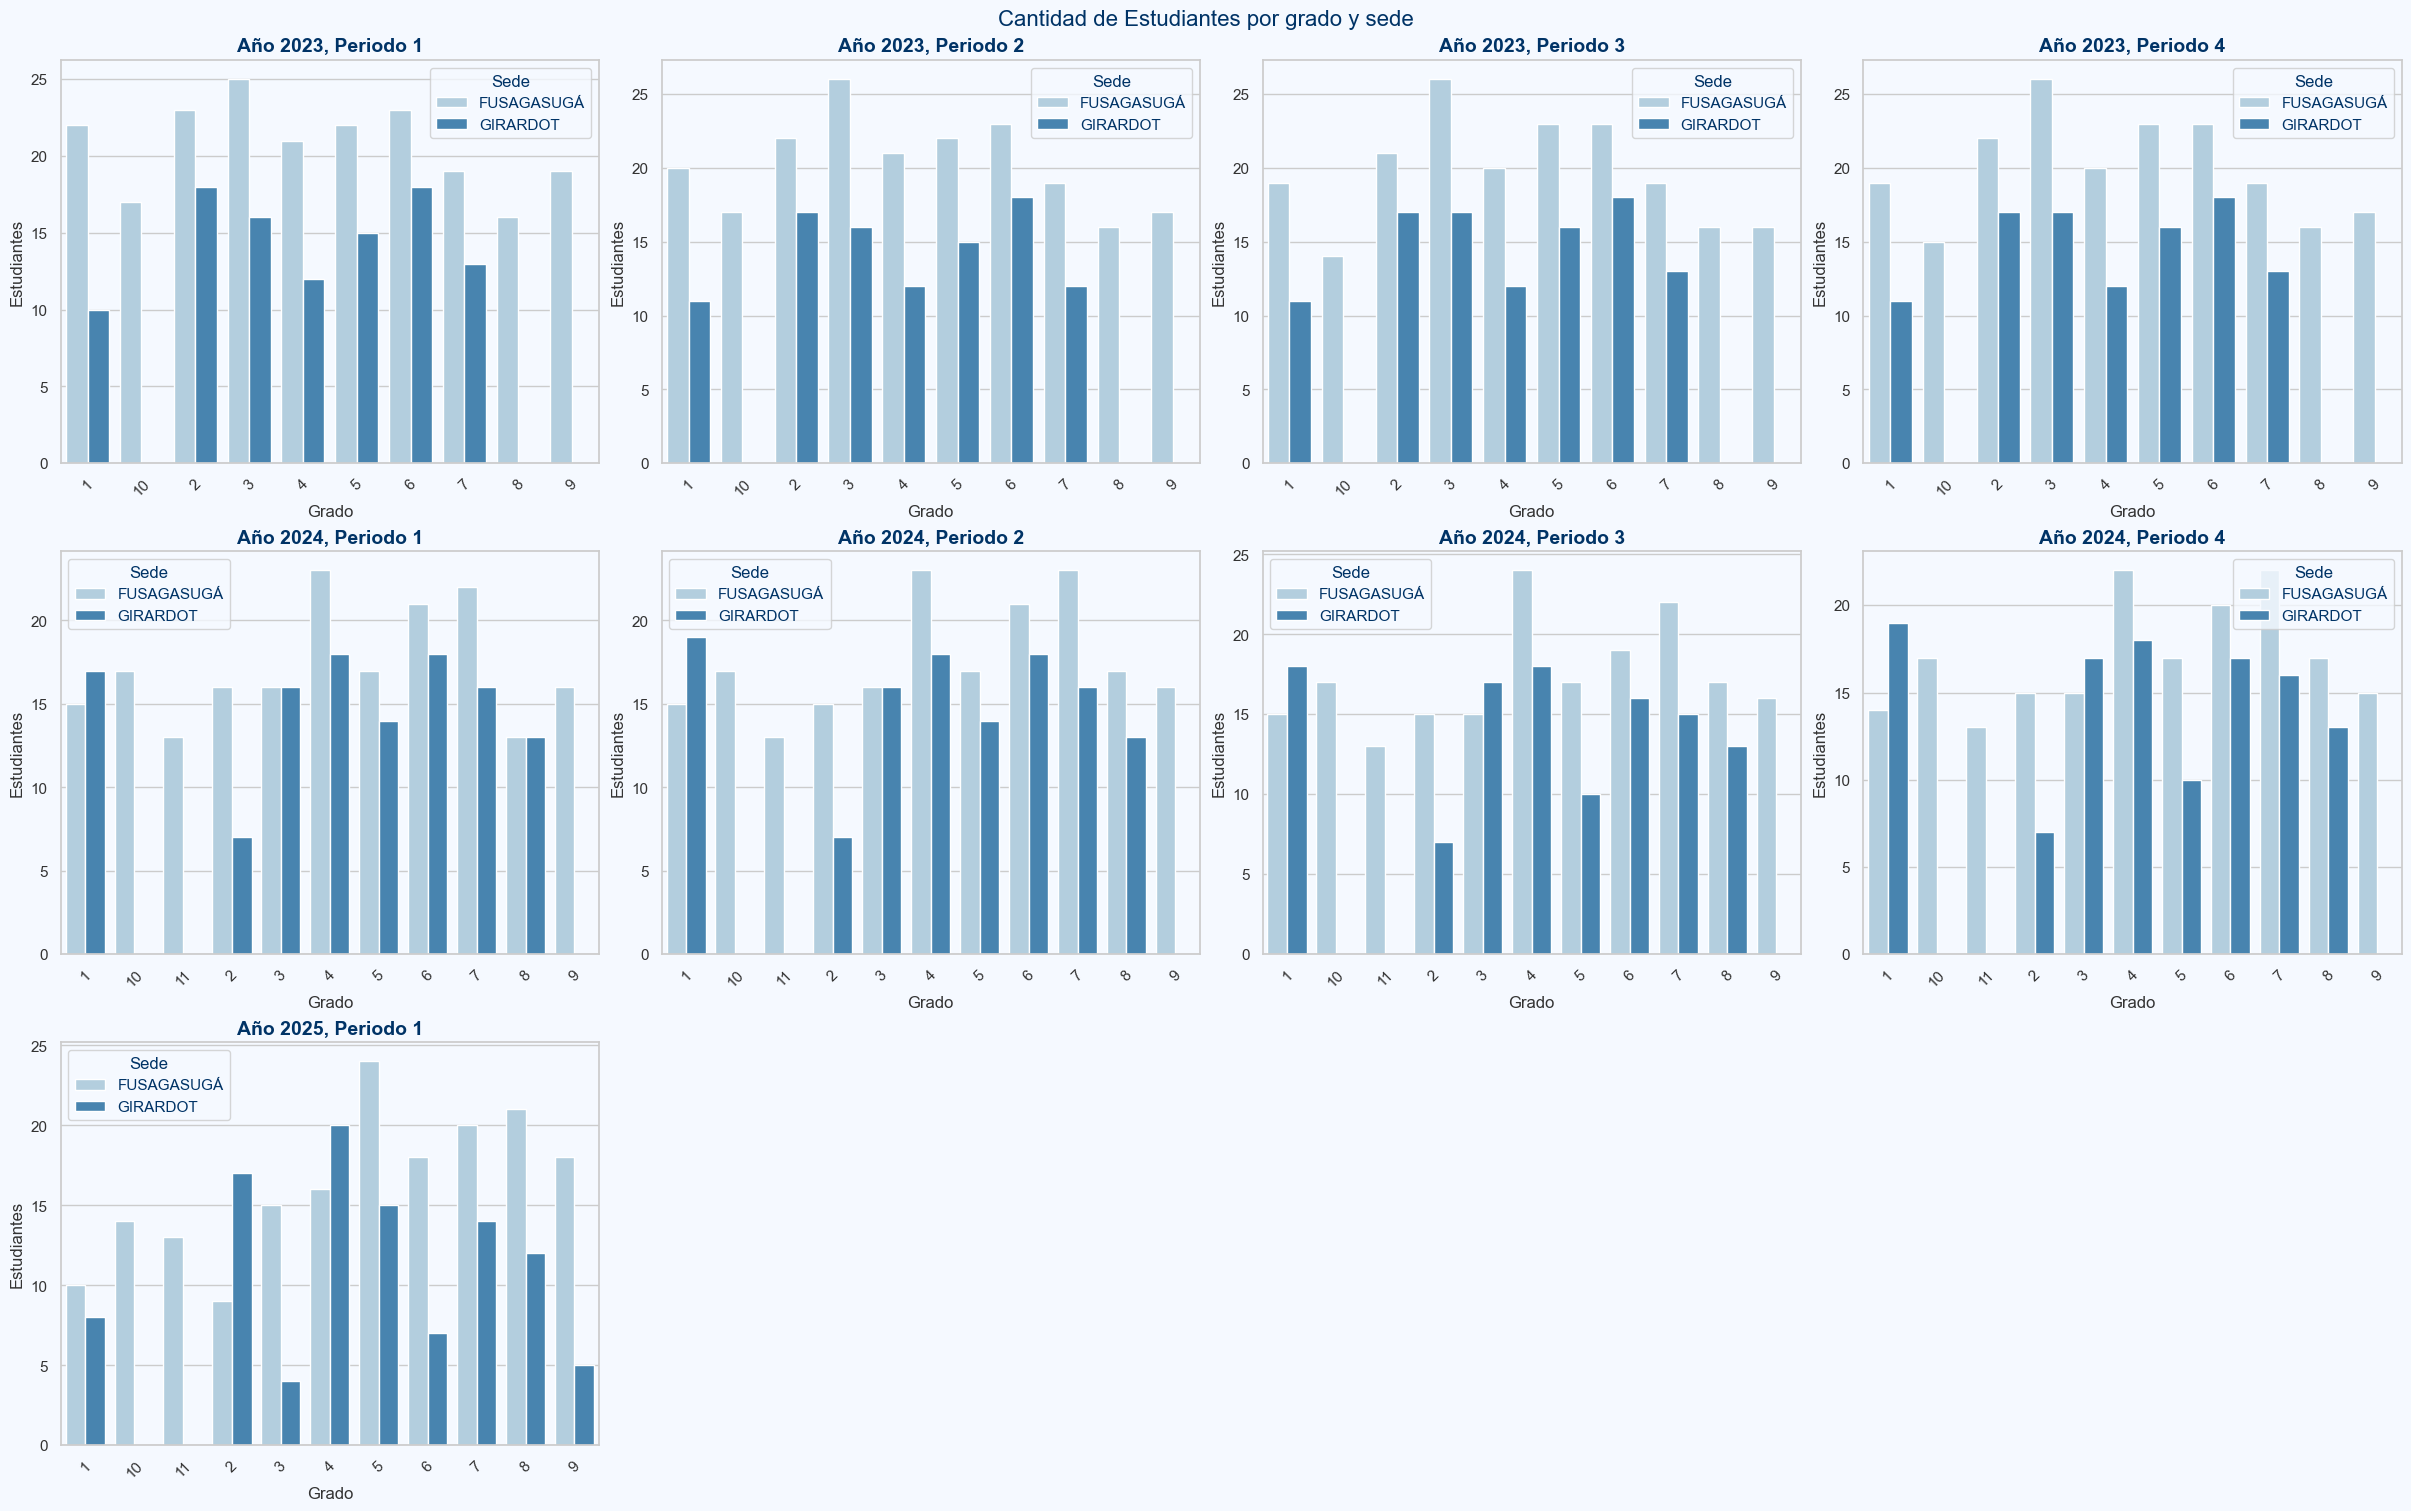

In [13]:
def graficar_estudiantes_grid(df: pd.DataFrame):
    configurar_estilo_bluelight()
    años_periodos = df[['Año', 'Periodo']].drop_duplicates().sort_values(['Año', 'Periodo'])
    total = len(años_periodos)
    cols = 4
    rows = math.ceil(total / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5), constrained_layout=True)
    axes = axes.flatten()

    for i, (_, row) in enumerate(años_periodos.iterrows()):
        año, periodo = row['Año'], row['Periodo']
        subset = df[(df['Año'] == año) & (df['Periodo'] == periodo)]
        conteo = (
            subset.drop_duplicates(["Grado", "Sede", "Estudiante"])
                  .groupby(["Grado", "Sede"])
                  .size()
                  .reset_index(name="Cantidad de Estudiantes")
        )

        sns.barplot(data=conteo, x="Grado", y="Cantidad de Estudiantes", hue="Sede", palette="Blues", ax=axes[i])
        axes[i].set_title(f"Año {año}, Periodo {periodo}")
        axes[i].set_xlabel("Grado")
        axes[i].set_ylabel("Estudiantes")
        axes[i].tick_params(axis='x', rotation=45)
    
    # Quitar ejes vacíos si hay menos de 3*N combinaciones
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle("Cantidad de Estudiantes por grado y sede", fontsize=16)
    plt.show()
graficar_estudiantes_grid(df_limpio)

In [ ]:
#setear Grupo con valor por la moda
#import numpy as np  
#df_imputado['Grupo'] = df_imputado.groupby([ 'Estudiante', 'Grado','Periodo'])['Grupo'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)


## Imputar notas faltantes de Cognitiva y Procedimental teniendo en cuenta los pesos

In [ ]:
def imputar_cog_proc_resultado(df):
    df = df.copy()
    # Máscara donde Cog y Proc son NaN, pero Act, Axi y Resultado están presentes
    mask = (df["Cog"].isna() & df["Proc"].isna())

    # Calcular suma de Cog + Proc
    cog_proc = (
        df.loc[mask, "Resultado"] -
        0.15 * df.loc[mask, "Act"] -
        0.15 * df.loc[mask, "Axi"]
    ) / 0.7

    # Asignar mitad a Cog y Proc
    df.loc[mask, "Cog"] = cog_proc / 2
    df.loc[mask, "Proc"] = cog_proc / 2

    # Reportar cantidad imputada
    print(f"Imputados Cog y Proc: {mask.sum()} filas")

    return df

In [15]:

df_imputado = imputar_cog_proc_resultado(df_imputado)

Imputados Cog y Proc: 105 filas


In [16]:
mask_debug = (
    df_imputado["Cog"].isna() & df_imputado["Proc"].isna() 
)
print("Filas candidatas para imputar Cog/Proc:", mask_debug.sum())


Filas candidatas para imputar Cog/Proc: 0


In [17]:
df_imputado.isnull().sum()

Sede                  0
Estudiante            0
Grado                 0
Grupo                 0
Periodo               0
Año                   0
Intensidad_Horaria    0
Asignatura            0
Cog                   0
Proc                  0
Act                   0
Axi                   0
Docente               0
Resultado             0
Nivel                 0
Identificación        0
dtype: int64

In [24]:
def detectar_asignaturas_faltantes(df: pd.DataFrame) -> pd.DataFrame:
    # Asegura que no haya duplicados innecesarios
    df_unico = df.drop_duplicates(["Estudiante", "Grado", "Año", "Periodo", "Asignatura"])

    # Paso 1: Asignaturas esperadas por Grado, Año, Periodo
    asignaturas_esperadas = (
        df_unico.groupby(["Grado", "Año", "Periodo"])["Asignatura"]
                .apply(set)
                .reset_index()
                .rename(columns={"Asignatura": "Esperadas"})
    )

    # Paso 2: Asignaturas por estudiante (Grado, Año, Periodo)
    asignaturas_por_estudiante = (
        df_unico.groupby(["Estudiante", "Grado", "Año", "Periodo"])["Asignatura"]
                .apply(set)
                .reset_index()
                .rename(columns={"Asignatura": "Registradas"})
    )

    # Paso 3: Merge para comparar
    df_comparado = asignaturas_por_estudiante.merge(
        asignaturas_esperadas,
        on=["Grado", "Año", "Periodo"],
        how="left"
    )

    # Paso 4: Detectar faltantes
    df_comparado["Faltantes"] = df_comparado.apply(
        lambda row: list(row["Esperadas"] - row["Registradas"]), axis=1
    )
    df_comparado["Cantidad Faltantes"] = df_comparado["Faltantes"].apply(len)

    # Filtrar solo los que tienen faltantes
    df_faltantes = df_comparado[df_comparado["Cantidad Faltantes"] > 0].copy()

    return df_faltantes[[
        "Estudiante", "Grado", "Año", "Periodo", "Faltantes", "Cantidad Faltantes"
    ]]

In [26]:
df_faltantes = detectar_asignaturas_faltantes(df_imputado)
df_faltantes.to_csv("../../data/processed/asignaturas_faltantes_2023_2025.csv", index=False)
df_faltantes.info()


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 10 to 2528
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Estudiante          36 non-null     object
 1   Grado               36 non-null     object
 2   Año                 36 non-null     object
 3   Periodo             36 non-null     object
 4   Faltantes           36 non-null     object
 5   Cantidad Faltantes  36 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 2.0+ KB


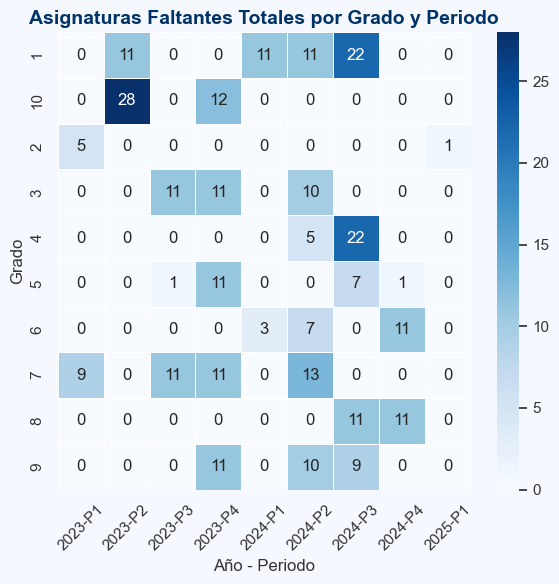

In [31]:

def graficar_faltantes_heatmap(df_faltantes: pd.DataFrame):
    # Agrupamos por Grado, Año y Periodo
    resumen = (
        df_faltantes.groupby(["Grado", "Año", "Periodo"])["Cantidad Faltantes"]
                    .sum()
                    .reset_index()
    )

    # Creamos una columna combinada para Año y Periodo
    resumen["Año-Periodo"] = resumen["Año"].astype(str) + "-P" + resumen["Periodo"].astype(str)

    # Pivot para heatmap
    heatmap_data = resumen.pivot(index="Grado", columns="Año-Periodo", values="Cantidad Faltantes").fillna(0)

    # Crear heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues", linewidths=.5)

    plt.title("Asignaturas Faltantes Totales por Grado y Periodo", fontsize=14)
    plt.xlabel("Año - Periodo")
    plt.ylabel("Grado")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
graficar_faltantes_heatmap(df_faltantes)


In [36]:
def imputar_asignaturas_faltantes(df_original: pd.DataFrame, umbral: int = 8) -> pd.DataFrame:
    df_faltantes = detectar_asignaturas_faltantes(df_original)

    # Filtramos solo los estudiantes con menos de 8 asignaturas registradas
    df_filtrado = df_faltantes[df_faltantes["Faltantes"].apply(len) < umbral]

    registros_imputados = []
    columnas = df_original.columns

    for _, fila in df_filtrado.iterrows():
        for asignatura in fila["Faltantes"]:
            nuevo_registro = {
                "Estudiante": fila["Estudiante"],
                "Grado": fila["Grado"],
                "Año": fila["Año"],
                "Periodo": fila["Periodo"],
                "Asignatura": asignatura
            }
            registros_imputados.append(nuevo_registro)

    df_imputados = pd.DataFrame(registros_imputados)

    # Agrega las columnas que falten al DataFrame imputado
    for col in columnas:
        if col not in df_imputados.columns:
            df_imputados[col] = None

    # Ordena columnas para que coincidan con el original
    df_imputados = df_imputados[columnas]

    # Combina original + imputado
    df_completo = pd.concat([df_original, df_imputados], ignore_index=True)

    return df_completo


In [37]:
df_completo = imputar_asignaturas_faltantes(df_imputado, umbral=8)


C:\Users\Cathe\AppData\Local\Temp\ipykernel_25196\1723552324.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_completo = pd.concat([df_original, df_imputados], ignore_index=True)


In [38]:
df_completo.info()
# Conteo de valores nulos   
df_completo.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32710 entries, 0 to 32709
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sede                     32676 non-null  object 
 1   Estudiante               32710 non-null  object 
 2   Grado                    32710 non-null  object 
 3   Grupo                    32676 non-null  object 
 4   Periodo                  32710 non-null  object 
 5   Año                      32710 non-null  object 
 6   Intensidad_Horaria       32676 non-null  object 
 7   Asignatura               32710 non-null  object 
 8   Cog                      32676 non-null  float64
 9   Proc                     32676 non-null  float64
 10  Act                      32676 non-null  object 
 11  Axi                      32676 non-null  object 
 12  Docente                  32676 non-null  object 
 13  Resultado                32676 non-null  object 
 14  Nivel                 

Sede                       34
Estudiante                  0
Grado                       0
Grupo                      34
Periodo                     0
Año                         0
Intensidad_Horaria         34
Asignatura                  0
Cog                        34
Proc                       34
Act                        34
Axi                        34
Docente                    34
Resultado                  34
Nivel                      34
Identificación             34
Cantidad de Asignaturas    34
dtype: int64

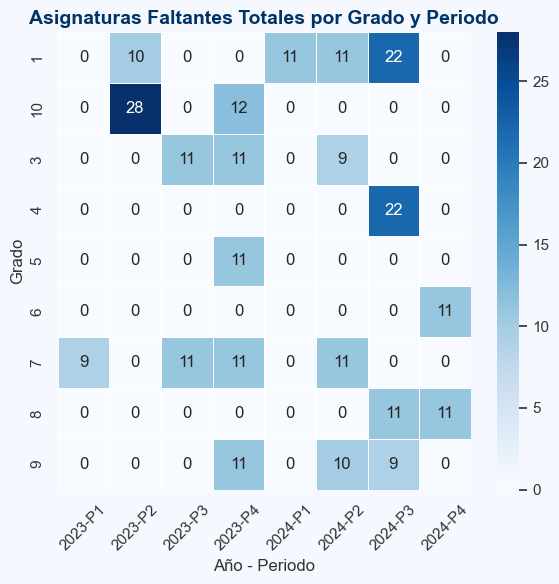

In [40]:
faltantes_after_imputacion = detectar_asignaturas_faltantes(df_completo)
graficar_faltantes_heatmap(faltantes_after_imputacion)

In [41]:
def imputar_faltantes_con_moda_y_mediana(df: pd.DataFrame) -> pd.DataFrame:
    df_imputado = df.copy()
    columnas_moda = [
        "Sede", "Grupo", "Cog", "Proc", "Docente", "Nivel", 
        "Identificación", "Intensidad_Horaria", "Cantidad de Asignaturas"
    ]
    columnas_mediana = ["Act", "Axi", "Resultado"]

    # Agrupar por Año, Periodo y Grado
    agrupador = ["Año", "Periodo", "Grado"]

    for col in columnas_moda:
        df_imputado[col] = df_imputado.groupby(agrupador)[col].transform(
            lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None)
        )

    for col in columnas_mediana:
        df_imputado[col] = df_imputado.groupby(agrupador)[col].transform(
            lambda x: x.fillna(x.median())
        )

    return df_imputado


In [42]:
df_final = imputar_faltantes_con_moda_y_mediana(df_completo)
df_final.info()
# Conteo de valores nulos   
df_final.isnull().sum()

C:\Users\Cathe\AppData\Local\Temp\ipykernel_25196\1551847062.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None)
C:\Users\Cathe\AppData\Local\Temp\ipykernel_25196\1551847062.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None)
C:\Users\Cathe\AppData\Local\Temp\ipykernel_25196\1551847062.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. C

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32710 entries, 0 to 32709
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sede                     32710 non-null  object 
 1   Estudiante               32710 non-null  object 
 2   Grado                    32710 non-null  object 
 3   Grupo                    32710 non-null  object 
 4   Periodo                  32710 non-null  object 
 5   Año                      32710 non-null  object 
 6   Intensidad_Horaria       32710 non-null  int64  
 7   Asignatura               32710 non-null  object 
 8   Cog                      32710 non-null  float64
 9   Proc                     32710 non-null  float64
 10  Act                      32710 non-null  float64
 11  Axi                      32710 non-null  float64
 12  Docente                  32710 non-null  object 
 13  Resultado                32710 non-null  float64
 14  Nivel                 

C:\Users\Cathe\AppData\Local\Temp\ipykernel_25196\1551847062.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.median())
C:\Users\Cathe\AppData\Local\Temp\ipykernel_25196\1551847062.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.median())
C:\Users\Cathe\AppData\Local\Temp\ipykernel_25196\1551847062.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavi

Sede                       0
Estudiante                 0
Grado                      0
Grupo                      0
Periodo                    0
Año                        0
Intensidad_Horaria         0
Asignatura                 0
Cog                        0
Proc                       0
Act                        0
Axi                        0
Docente                    0
Resultado                  0
Nivel                      0
Identificación             0
Cantidad de Asignaturas    0
dtype: int64

In [43]:
#guardar el dataframe final
df_final.to_csv("../../data/processed/data_imputed_notes_2023_2025.csv", index=False)